In [1]:
import numpy as np  
import matplotlib.pyplot as plt  
import pandas as pd 
import seaborn as sb
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score  
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split


In [2]:
testdata =pd.read_csv("mpg_trainset.csv")

In [3]:
traindata =pd.read_csv("mpg_trainset.csv")

In [4]:
traindata

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
0,15.0,8,350.0,165,3693,11.5,70,1
1,18.0,8,318.0,150,3436,11.0,70,1
2,17.0,8,302.0,140,3449,10.5,70,1
3,15.0,8,429.0,198,4341,10.0,70,1
4,14.0,8,440.0,215,4312,8.5,70,1
...,...,...,...,...,...,...,...,...
235,32.0,4,144.0,96,2665,13.9,82,3
236,27.0,4,151.0,90,2950,17.3,82,1
237,27.0,4,140.0,86,2790,15.6,82,1
238,32.0,4,135.0,84,2295,11.6,82,1


In [5]:
testdata =pd.read_csv("mpg_testset.csv")

In [6]:
traindata.isna().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
year            0
origin          0
dtype: int64

In [7]:
C_nums = {"origin": {1: "USA",2:"NON USA", 3:"NON USA" }} # Convert the oringin to USA and NON USA
traindata.replace(C_nums, inplace=True)

In [8]:
C_nums = {"origin": {1: "USA",2:"NON USA", 3:"NON USA" }} # Convert the oringin to USA and NON USA
testdata.replace(C_nums, inplace=True)

In [9]:
traindata.head(25)

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
0,15.0,8,350.0,165,3693,11.5,70,USA
1,18.0,8,318.0,150,3436,11.0,70,USA
2,17.0,8,302.0,140,3449,10.5,70,USA
3,15.0,8,429.0,198,4341,10.0,70,USA
4,14.0,8,440.0,215,4312,8.5,70,USA
5,14.0,8,455.0,225,4425,10.0,70,USA
6,15.0,8,383.0,170,3563,10.0,70,USA
7,14.0,8,340.0,160,3609,8.0,70,USA
8,14.0,8,455.0,225,3086,10.0,70,USA
9,24.0,4,113.0,95,2372,15.0,70,NON USA


In [10]:
testdata

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
0,18.0,8,307,130,3504,12.0,70,USA
1,16.0,8,304,150,3433,12.0,70,USA
2,14.0,8,454,220,4354,9.0,70,USA
3,15.0,8,390,190,3850,8.5,70,USA
4,15.0,8,400,150,3761,9.5,70,USA
...,...,...,...,...,...,...,...,...
127,38.0,4,91,67,1995,16.2,82,NON USA
128,26.0,4,156,92,2585,14.5,82,USA
129,36.0,4,135,84,2370,13.0,82,USA
130,44.0,4,97,52,2130,24.6,82,NON USA


In [11]:
traindata["origin"] = pd.factorize(traindata["origin"])[0]
testdata["origin"] = pd.factorize(testdata["origin"])[0]

In [12]:
traindata

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
0,15.0,8,350.0,165,3693,11.5,70,0
1,18.0,8,318.0,150,3436,11.0,70,0
2,17.0,8,302.0,140,3449,10.5,70,0
3,15.0,8,429.0,198,4341,10.0,70,0
4,14.0,8,440.0,215,4312,8.5,70,0
...,...,...,...,...,...,...,...,...
235,32.0,4,144.0,96,2665,13.9,82,1
236,27.0,4,151.0,90,2950,17.3,82,0
237,27.0,4,140.0,86,2790,15.6,82,0
238,32.0,4,135.0,84,2295,11.6,82,0


In [13]:
testdata

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
0,18.0,8,307,130,3504,12.0,70,0
1,16.0,8,304,150,3433,12.0,70,0
2,14.0,8,454,220,4354,9.0,70,0
3,15.0,8,390,190,3850,8.5,70,0
4,15.0,8,400,150,3761,9.5,70,0
...,...,...,...,...,...,...,...,...
127,38.0,4,91,67,1995,16.2,82,1
128,26.0,4,156,92,2585,14.5,82,0
129,36.0,4,135,84,2370,13.0,82,0
130,44.0,4,97,52,2130,24.6,82,1


In [14]:
x_train = traindata.iloc[:, :-1].values
y_train = traindata.iloc[:, [-1]].values.reshape(-1)
x_test= testdata.iloc[:, :-1].values
y_test = testdata.iloc[:, [-1]].values.reshape(-1)

In [15]:
x_train.shape

(240, 7)

In [16]:
y_train.shape

(240,)

In [17]:
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
x_train= scale.fit_transform(x_train)

In [18]:
x_test= scale.fit_transform(x_test)

In [19]:
#x_train =(x_train-x_train.min())/(x_train.max()-x_train.min())
#x_test =(x_test-x_test.min())/(x_test.max()-x_test.min())

In [20]:
y_test.shape

(132,)

In [21]:
from sklearn.linear_model import LogisticRegression
#instantiate model
logreg = LogisticRegression(max_iter=500, C=0.1)

#fit model
logreg.fit(x_train, y_train)

LogisticRegression(C=0.1, max_iter=500)

In [23]:
logreg.predict_proba(x_train)[0:10]

array([[0.96896561, 0.03103439],
       [0.94771195, 0.05228805],
       [0.9428669 , 0.0571331 ],
       [0.98671013, 0.01328987],
       [0.98753787, 0.01246213],
       [0.99000091, 0.00999909],
       [0.97403114, 0.02596886],
       [0.96255973, 0.03744027],
       [0.98330072, 0.01669928],
       [0.34279415, 0.65720585]])

In [24]:
# print the first 10 predicted probabilities for class 1
logreg.predict_proba(x_test)[0:10, 1]
# store the predicted probabilities for class 1
y_pred_prob = logreg.predict_proba(x_test)[:, 1]


In [25]:
logreg.fit(x_train, y_train)

y_predicted = logreg.predict(x_test)

In [26]:
y_predicted = np.round(y_predicted)

In [27]:
cm = confusion_matrix(y_test, y_predicted)
print(cm)

[[70  7]
 [15 40]]


In [31]:
print (cm[0][0],cm[0][1],cm[1][0],cm[1][1])
sensitivity=cm[0][0]/(cm[0][0]+cm[0][1])
print ('sensitivity',sensitivity)
specificity=cm[1][1]/(cm[1][0]+cm[1][1])
print('Specificity',specificity)

70 7 15 40
sensitivity 0.9090909090909091
Specificity 0.7272727272727273


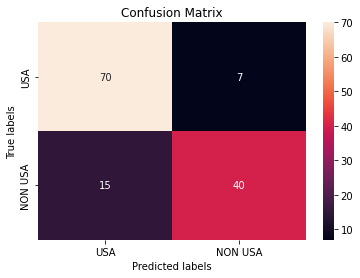

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt     

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['USA', 'NON USA']); ax.yaxis.set_ticklabels(['USA', 'NON USA']);

In [33]:
print("Accuracy:",accuracy_score(y_test, y_predicted))

Accuracy: 0.8333333333333334


[array([-0.69366314, -0.69244234, -0.69228148, -0.69235562, -0.69283193,
       -0.69415872, -0.69396189]), array([-0.69831873, -0.68612118, -0.68452389, -0.68525976, -0.68999913,
       -0.70330854, -0.70132413]), array([-0.74605946, -0.62512231, -0.61028498, -0.61709148, -0.66211396,
       -0.79935186, -0.77789745]), array([-1.33649758, -0.21841364, -0.16288549, -0.18664802, -0.42675034,
       -2.14637499, -1.8078848 ]), array([-1.03165316e+01, -7.51113478e-07, -3.00140961e-08, -1.32384477e-07,
       -1.82357820e-03, -2.02205002e+01, -1.62875734e+01]), array([-103.16498526,    0.        ,    0.        ,    0.        ,
          0.        , -202.20500204, -162.87573348])]


<function matplotlib.pyplot.show(close=None, block=None)>

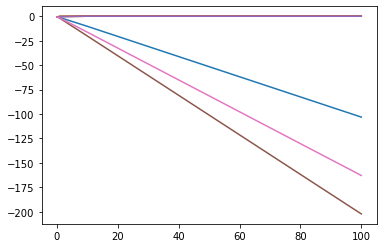

In [64]:
C =  [0.001, 0.01, 0.1, 1, 10,100]

def J(x, y, C):
    m= x.shape[0]
    z = x*C
    h = 1/(1 + np.exp(-z))
    J = -(1/m) * h.T * y  +np.log(h).T * (1-y)
    return J
cost = [J(x_train[6], y_train[6], i) for i in C]
print(cost)
plt.plot(C, cost)
plt.show

2. Consider the dataset MPG with 3 categories in Origin target feature.
a. Preprocess the dataset appropriately
b. Apply Logistic regression on the preprocessed dataset with regularization 
parameter C = 0.1
# define model
model = LogisticRegression(multi_class='ovr')
# fit model
model.fit(X, y)
# make predictions
yhat = model.predict(X)


In [22]:
testdata =pd.read_csv("mpg_trainset.csv")     #load the datasets
traindata =pd.read_csv("mpg_trainset.csv")

In [23]:
X_train = traindata.iloc[:, :-1].values
Y_train = traindata.iloc[:, [-1]].values.reshape(-1)
X_test= testdata.iloc[:, :-1].values
Y_test = testdata.iloc[:, [-1]].values.reshape(-1)

In [47]:
print(Y_train)

[1 1 1 1 1 1 1 1 1 3 1 2 2 2 2 1 1 1 3 3 1 1 1 1 1 1 1 1 1 2 2 3 2 1 1 1 1
 1 1 1 1 1 3 1 1 2 2 1 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 3 1 1 1 1 2 2 1
 2 1 1 1 1 3 1 1 1 1 1 1 2 2 3 1 2 3 2 1 1 1 1 1 1 1 1 1 1 1 1 3 2 1 2 2 2
 3 2 1 2 1 1 1 1 1 1 1 1 1 1 3 3 2 1 2 1 1 1 1 2 3 1 1 1 1 1 1 1 2 3 1 1 3
 3 2 2 1 3 1 1 1 1 1 1 1 1 1 1 1 1 3 1 1 2 2 2 2 3 1 1 1 1 1 1 1 1 2 3 1 2
 1 1 3 1 1 1 2 1 3 1 1 2 3 3 3 1 3 2 3 2 2 1 1 1 1 1 3 3 3 1 1 2 3 2 3 1 1
 1 1 1 1 1 2 3 1 3 3 3 1 1 3 1 1 1 1]


In [48]:
print(Y_test)

[1 1 1 1 1 1 1 1 1 3 1 2 2 2 2 1 1 1 3 3 1 1 1 1 1 1 1 1 1 2 2 3 2 1 1 1 1
 1 1 1 1 1 3 1 1 2 2 1 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 3 1 1 1 1 2 2 1
 2 1 1 1 1 3 1 1 1 1 1 1 2 2 3 1 2 3 2 1 1 1 1 1 1 1 1 1 1 1 1 3 2 1 2 2 2
 3 2 1 2 1 1 1 1 1 1 1 1 1 1 3 3 2 1 2 1 1 1 1 2 3 1 1 1 1 1 1 1 2 3 1 1 3
 3 2 2 1 3 1 1 1 1 1 1 1 1 1 1 1 1 3 1 1 2 2 2 2 3 1 1 1 1 1 1 1 1 2 3 1 2
 1 1 3 1 1 1 2 1 3 1 1 2 3 3 3 1 3 2 3 2 2 1 1 1 1 1 3 3 3 1 1 2 3 2 3 1 1
 1 1 1 1 1 2 3 1 3 3 3 1 1 3 1 1 1 1]


In [49]:
#X_train =(X_train-X_train.min())/(X_train.max()-X_train.min()) # normalise the training dataset using min max

In [24]:
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
X_train= scale.fit_transform(X_train)
#x_test= scale.fit_transform(x_test)

In [58]:
X_train

array([[-1.03164985,  1.41017087,  1.42072853, ...,  0.78117444,
        -1.45365929, -1.62875733],
       [-0.64508316,  1.41017087,  1.11873451, ...,  0.4835088 ,
        -1.64312287, -1.62875733],
       [-0.77393873,  1.41017087,  0.96773749, ...,  0.49856582,
        -1.83258644, -1.62875733],
       ...,
       [ 0.51461691, -0.90395569, -0.56110726, ..., -0.26470911,
         0.09994204,  1.67231313],
       [ 1.15889472, -0.90395569, -0.60829382, ..., -0.83803398,
        -1.41576658,  1.67231313],
       [ 0.64347247, -0.90395569, -0.74985352, ..., -0.4558174 ,
         1.2367235 ,  1.67231313]])

In [25]:
from sklearn.linear_model import LogisticRegression
#instantiate model
log = LogisticRegression(max_iter=500, C=0.1, multi_class= "multinomial")

#fit model
log.fit(X_train, Y_train)

LogisticRegression(C=0.1, max_iter=500, multi_class='multinomial')

In [26]:
Y_predicted = log.predict(X_test)

In [61]:
Y_predicted

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
      dtype=int64)

In [27]:
CM = confusion_matrix(Y_test, Y_predicted)
print(CM)

[[159   0   0]
 [ 42   0   0]
 [ 39   0   0]]


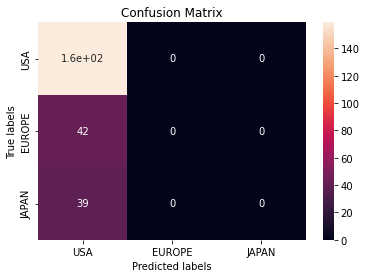

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt     

ax= plt.subplot()
sns.heatmap(CM, annot=True, ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['USA', 'EUROPE', 'JAPAN']); ax.yaxis.set_ticklabels(['USA', 'EUROPE', 'JAPAN']);